In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
load_digits().keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
load_digits().target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
load_digits().DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [5]:
digits=load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Figure size 432x288 with 0 Axes>

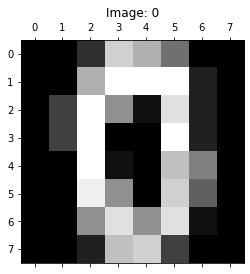

In [6]:
plt.gray()
plt.matshow(digits.images[20])
plt.title(f'Image: {digits.target[20]}')
plt.show()

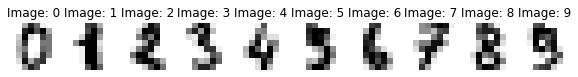

In [7]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 8))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Image: {label}')

In [8]:
model = KMeans(n_clusters=10, random_state=42)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

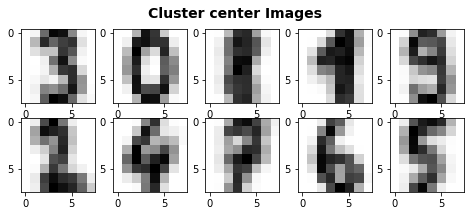

In [9]:
fig=plt.figure(figsize=(8,3))
fig.suptitle('Cluster center Images',fontsize=14,fontweight='bold')
for i in range(10):
    # Initialize subplot in a grid of 2x5 at i+1th position 
    ax=fig.add_subplot(2,5,i+1)
    # Display images
    ax.imshow(model.cluster_centers_[i].reshape((8,8)),cmap=plt.cm.binary)
plt.show()

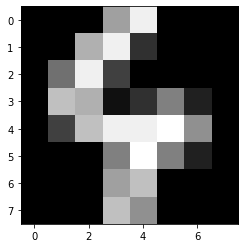

In [15]:
plt.imshow(digits.images[110])

In [16]:
# Convert 2d into 1-d dimension
zero=digits.images[110].flatten()
zero

array([ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  3.,
        0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
       11.,  1.,  3.,  8.,  2.,  0.,  0.,  4., 12., 15., 15., 16.,  9.,
        0.,  0.,  0.,  0.,  8., 16.,  8.,  2.,  0.,  0.,  0.,  0., 10.,
       12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.])

In [17]:
pred=model.predict(digits.data)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, pred)

array([[  0, 177,   0,   0,   0,   0,   1,   0,   0,   0],
       [  1,   0,  99,  55,   0,  24,   0,   0,   2,   1],
       [ 13,   1,   8,   2,   2, 148,   0,   3,   0,   0],
       [154,   0,   7,   0,  13,   0,   0,   7,   0,   2],
       [  0,   0,   3,   5,   0,   0, 164,   9,   0,   0],
       [  0,   0,   0,   0,  43,   0,   2,   0,   1, 136],
       [  0,   1,   2,   1,   0,   0,   0,   0, 177,   0],
       [  0,   0,   2,   2,   0,   0,   0, 174,   0,   1],
       [  2,   0, 100,   6,  52,   3,   0,   5,   2,   4],
       [  6,   0,   2,  20, 139,   0,   0,   7,   0,   6]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
target_names = ['Image 0', 'Image 1', 'Image 2','Image 3','Image 4','Image 5','Image 6','Image 7','Image 8','Image 9']
print(classification_report(digits.target,pred,target_names=target_names))

              precision    recall  f1-score   support

     Image 0       0.00      0.00      0.00       178
     Image 1       0.00      0.00      0.00       182
     Image 2       0.04      0.05      0.04       177
     Image 3       0.00      0.00      0.00       183
     Image 4       0.00      0.00      0.00       181
     Image 5       0.00      0.00      0.00       182
     Image 6       0.00      0.00      0.00       181
     Image 7       0.85      0.97      0.91       179
     Image 8       0.01      0.01      0.01       174
     Image 9       0.04      0.03      0.04       180

    accuracy                           0.11      1797
   macro avg       0.09      0.11      0.10      1797
weighted avg       0.09      0.11      0.10      1797

